In [13]:

%matplotlib inline
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [49]:

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [50]:
pd.DataFrame(X).describe()

,0,1
count,1000.000000,1000.000000
mean,-0.969305,-0.014667
std,0.949301,1.309215
min,-4.566608,-3.150534
25%,-1.575254,-1.041037
50%,-0.949143,-0.126593
75%,-0.352764,0.972165
max,3.159562,4.774432


In [51]:
from sklearn.svm import SVC

x_min = -5
x_max = 5
y_min = -5
y_max = 5
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]

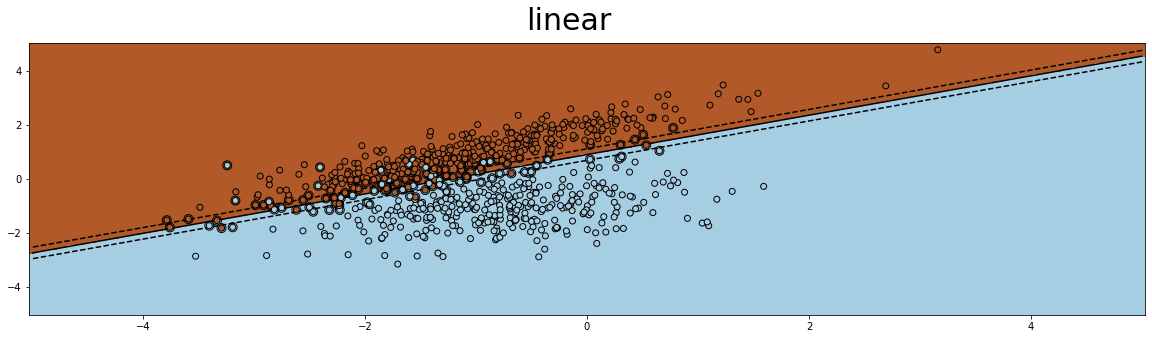

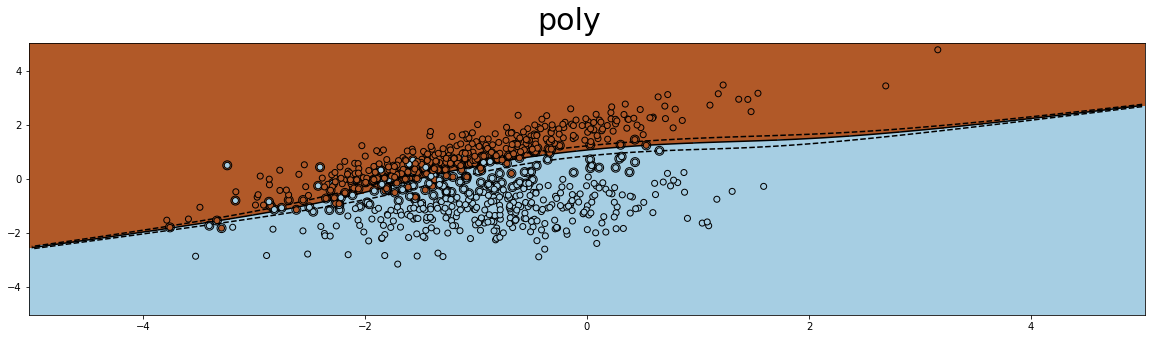

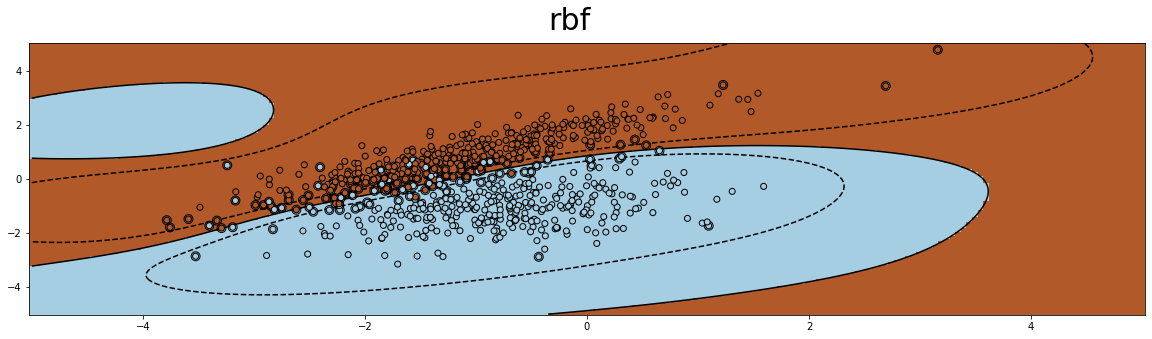

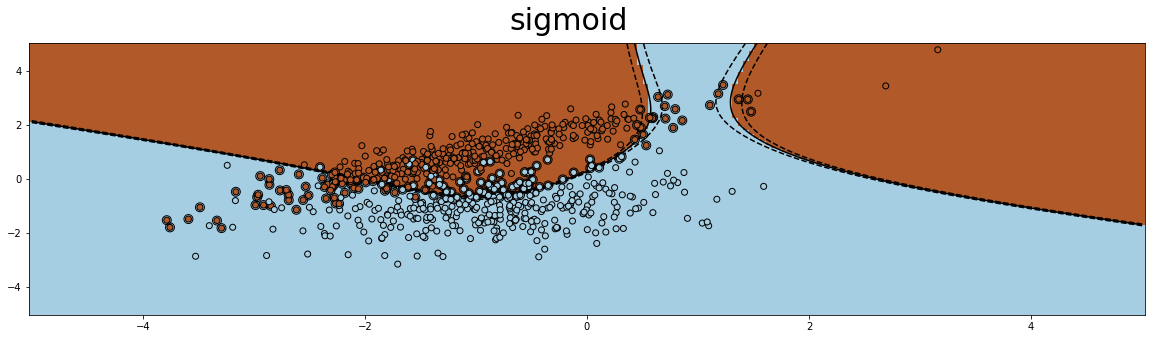

In [57]:
results = pd.Series(dtype=float)
for kernel in ['linear', 'poly', 'rbf', 'sigmoid',]:
    clf = SVC(C=1, kernel=kernel, random_state=2).fit(X_train, y_train)
    results[kernel] = clf.score(X_test, y_test)

    plt.figure(figsize=(20, 5),)
    plt.suptitle(kernel, fontsize=30)
    # plt.clf()

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
     zorder=10, cmap=plt.cm.Paired, edgecolors="k")


    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

In [40]:
results

linear     0.936
poly       0.920
rbf        0.936
sigmoid    0.932
dtype: float64

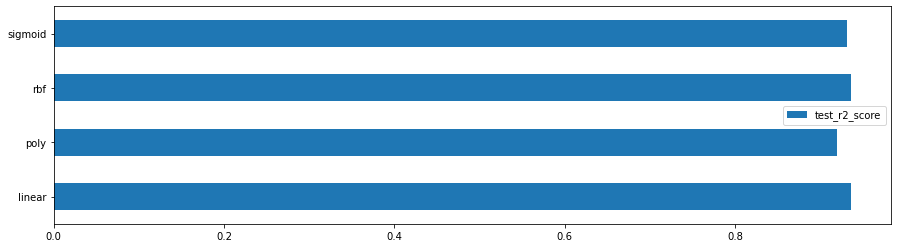

In [41]:
results.to_frame('test_r2_score').plot(kind='barh', figsize=(15, 4))
plt.show()